# Python для сбора данных

*Алла Тамбовцева, НИУ ВШЭ*

### Семинар 6:  графики и виджеты

### Задание 1

Загрузите данные из файла `Chile.csv` в датафрейм `ch` и удалите из него строки с пропущенными значениями.

In [1]:
import pandas as pd

ch = pd.read_csv("https://allatambov.github.io/pydj/seminars/Chile.csv")
ch.dropna(inplace = True)

### Задание 2

Создайте виджет типа *Dropdown*, выпадающее меню, где опциями меню являются названия столбцов датафрейма `ch`, кроме `Unnamed:0`, а значением по умолчанию является `population`. Сохраните его в переменную `choose` и выведите на экран.

In [2]:
import ipywidgets as widgets

choose = widgets.Dropdown(options = ch.columns[1:], 
                         value = "population", 
                         description = "Column:")
display(choose)

Dropdown(description='Column:', index=1, options=('region', 'population', 'sex', 'age', 'education', 'income',…

### Задание 3

Напишите функцию `desc_plot()`, которая принимает на вход строку с названием столбца, которое выбрал пользователь в выпадающем меню, и строит соответствующий график:

* если тип столбца не `object`, то строит гистограмму;
* если тип столбца `object`, то строит столбиковую диаграмму.

In [3]:
import seaborn as sns
sns.set()

def desc_plot(c):
    if ch[c].dtype != "object":
        sns.distplot(ch[c], kde = False)
    else:
        tab = ch[c].value_counts()
        x = tab.index
        y = tab.values
        sns.barplot(x, y)

### Задание 4

Создайте виджет-кнопку типа *Button* и сделайте так, чтобы при нажатии на эту кнопку активировалась функция `desc_plot()`, написанная выше.

**Подсказка:** посмотрите официальную документацию по событиям (*Events*) в `ipywidgets` по [ссылке](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html).

In [4]:
# прежде изменим desc_plot()
# переопределим c, теперь c – это значение, выбранное в choose

def desc_plot(c):
    c = choose.value
    if ch[c].dtype != "object":
        sns.distplot(ch[c], kde = False)
    else:
        tab = ch[c].value_counts()
        x = tab.index
        y = tab.values
        sns.barplot(x, y)

In [5]:
button = widgets.Button(description = "Click")
button.on_click(desc_plot)

Dropdown(description='Column:', index=1, options=('region', 'population', 'sex', 'age', 'education', 'income',…

Button(description='Click', style=ButtonStyle())

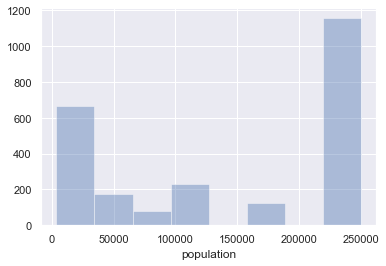

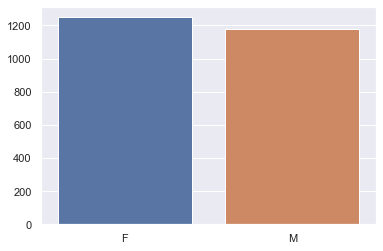

In [6]:
display(choose)
display(button)